In [2]:
import json
import pandas as pd
from tabulate import tabulate

In [6]:
with open(".\quality\quality_responses.json", 'r') as file:
    responses = json.load(file)

# Original

### Preference (Harmful self pref)

In [9]:
with open('.\quality\self_pref_quality.json', 'r') as file:
    preference_results = json.load(file)

In [61]:
df = pd.DataFrame(preference_results)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   44.00 |  109.00 |  119.00 |   27.00 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |  655.00 |   38.00 |  422.00 |    5.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |  135.00 |  113.00 |  535.00 |  151.00 |
+----------------------------------+---------+---------+---------+---------+

Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   14.72 |   36.45 |   39.8

In [ ]:
with open('.\quality\self_recog_quality.json', 'r') as file:
    results = json.load(file)
recog_results = results

In [ ]:
df = pd.DataFrame(recog_results)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("DETECTION")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

### Preference/Recog (both correct)

In [3]:
with open('.\quality\pref_both_correct_quality.json', 'r') as file:
    preference_results_both_correct = json.load(file)

### Preference/Recog (both wrong)

In [4]:
with open('.\quality\pref_both_wrong_quality.json', 'r') as file:
    preference_results_both_wrong = json.load(file)

### Pref Other wrong (source correct)

In [10]:
with open('.\quality\pref_other_wrong_quality.json', 'r') as file:
    preference_results_other_wrong = json.load(file)

### Overall Answer (QA) Acc

In [4]:
with open(".\quality\quality_responses.json", 'r') as file:
    responses = json.load(file)

In [5]:
# Define model names
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Maverick-17B-128E-Instruct-FP8","Llama-4-Scout-17B-16E-Instruct",  "DeepSeek-V3"]

# Initialize result tracking
accuracy_results = {model: {'correct': 0, 'total': 0} for model in model_names}

# Calculate accuracy for each model
for record in responses:
    gt_label = record.get('output_label')
    for model in model_names:
        model_label = record.get(f"{model}_output_label")
        if model_label is not None:
            accuracy_results[model]['total'] += 1
            if model_label == gt_label:
                accuracy_results[model]['correct'] += 1

# Create a DataFrame with counts and accuracy percentages
accuracy_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": result["correct"],
        "Total": result["total"],
        "Answer Accuracy (%)": f"{(result['correct'] / result['total'] * 100):.2f}%" if result["total"] > 0 else "N/A"
    }
    for model, result in accuracy_results.items()
])

# Print the result
print(tabulate(accuracy_df, headers="keys", tablefmt="grid"))

+----+----------------------------------------+-----------+---------+-----------------------+
|    | Model                                  |   Correct |   Total | Answer Accuracy (%)   |
+====+========================================+===========+=========+=======================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       844 |    2077 | 40.64%                |
+----+----------------------------------------+-----------+---------+-----------------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |       934 |    2078 | 44.95%                |
+----+----------------------------------------+-----------+---------+-----------------------+
|  2 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1224 |    2086 | 58.68%                |
+----+----------------------------------------+-----------+---------+-----------------------+
|  3 | Llama-4-Scout-17B-16E-Instruct         |      1089 |    2086 | 52.21%                |
+----+----------------------------------------+-----------+-

## Overall Evaluator Accuracy

In [11]:
with open('.\quality\self_pref_quality.json', 'r') as file:
    preference_results = json.load(file)
    
with open('.\quality\pref_other_wrong_quality.json', 'r') as file:
    preference_results_other_wrong = json.load(file)

In [13]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       999 |    3085 | 32.38%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |      1582 |    2873 | 55.06%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |      1678 |    2465 | 68.07%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1634 |    2030 | 80.49%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

#### In Harmful Quadrant

In [12]:
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]


# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       905 |    2174 | 41.63%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |      1180 |    1844 | 63.99%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |       727 |    1266 | 57.42%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |       503 |     779 | 64.57%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

#### In Beneficial Quadrant

In [11]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]


# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |        94 |     911 | 10.32%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |       402 |    1029 | 39.07%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |       951 |    1199 | 79.32%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1131 |    1251 | 90.41%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

## Win according to GT

In [8]:
# Reinitialize pairwise score dictionary with default values using defaultdict
from collections import defaultdict
from itertools import combinations
# Initialize pairwise score dictionary with default value 0
pairwise_scores = defaultdict(int)

model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize a dictionary to track total comparisons
pairwise_total_comparisons = defaultdict(int)

# Process each record
for record in responses:
    gt_label = record['output_label']
    
    # Determine correctness of each model, handling missing values
    correctness = {
        model: (record.get(f"{model}_output_label") == gt_label) if f"{model}_output_label" in record else None
        for model in model_names
    }
    
    # Compare every pair of models
    for model_a, model_b in combinations(model_names, 2):
        if correctness[model_a] is not None and correctness[model_b] is not None:
            pairwise_total_comparisons[(model_a, model_b)] += 1
            pairwise_total_comparisons[(model_b, model_a)] += 1

            if correctness[model_a] and not correctness[model_b]:
                pairwise_scores[(model_a, model_b)] += 1  # Model A wins over B
            elif correctness[model_b] and not correctness[model_a]:
                pairwise_scores[(model_b, model_a)] += 1  # Model B wins over A

# Compute winning percentages
pairwise_win_percentages = {
    pair: (wins / pairwise_total_comparisons[pair]) * 100 if pairwise_total_comparisons[pair] > 0 else 0
    for pair, wins in pairwise_scores.items()
}

# Convert results into a DataFrame with winning percentage
pairwise_results_df = pd.DataFrame(
    [(a, b, pairwise_total_comparisons[(a, b)], pairwise_scores[(a, b)], f"{pairwise_win_percentages[(a, b)]:.2f}%")
     for (a, b) in pairwise_total_comparisons.keys()],
    columns=["Model A", "Model B", "Total Comparisons", "Wins for Model A", "Winning Percentage (GT)"]
)

# Print results in tabular format
print(tabulate(pairwise_results_df, headers="keys", tablefmt="grid"))


+----+----------------------------------------+----------------------------------------+---------------------+--------------------+---------------------------+
|    | Model A                                | Model B                                |   Total Comparisons |   Wins for Model A | Winning Percentage (GT)   |
+====+========================================+========================================+=====================+====================+===========================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       | Qwen2.5-7B-Instruct-Turbo              |                2073 |                318 | 15.34%                    |
+----+----------------------------------------+----------------------------------------+---------------------+--------------------+---------------------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              | Meta-Llama-3.1-8B-Instruct-Turbo       |                2073 |                407 | 19.63%                    |
+----+----------------------------------

In [9]:
pairwise_results_df.to_csv('output.csv', index=False)

For each model, is there a correlation between its accuracy as an answer and as an evaluator?

In [68]:
import numpy as np
raw_acc = [40.5, 44.8, 67.6]
acc_eval = [24.79, 53.55, 67.55]
correlation_matrix = np.corrcoef(raw_acc, acc_eval)
print(correlation_matrix[0, 1])

0.8407379975125377


## Evaluator win race (Normal)

In [12]:
all_pref = preference_results + preference_results_other_wrong

In [13]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
from collections import defaultdict
from tabulate import tabulate

# Convert all_pref data into a DataFrame
df_pref = pd.DataFrame(all_pref)

# Initialize a dictionary to store the pairwise model winning rates
pairwise_wins = defaultdict(float)
pairwise_total = defaultdict(int)

# Iterate through each preference entry
for record in df_pref.itertuples(index=False):
    evaluator = record.evaluator
    evaluatee = record.evaluatee
    forward = record.forward_comparison
    backward = record.backward_comparison

    # Scoring logic based on forward and backward comparison
    if forward == "1" and backward == "2":
        pairwise_wins[(evaluator, evaluatee)] += 1  # Evaluator wins
    elif forward == "2" and backward == "1":
        pairwise_wins[(evaluatee, evaluator)] += 1  # Evaluatee wins
    elif (forward == "1" and backward == "1") or (forward == "2" and backward == "2"):
        pairwise_wins[(evaluator, evaluatee)] += 0.5
        pairwise_wins[(evaluatee, evaluator)] += 0.5

    # Track total comparisons
    pairwise_total[(evaluator, evaluatee)] += 1
    pairwise_total[(evaluatee, evaluator)] += 1

# # Compute winning rates as a percentage
# pairwise_win_rates = {
#     pair: (wins / pairwise_total[pair]) * 100 for pair, wins in pairwise_wins.items()
# }

# # Convert results into a DataFrame
# pairwise_win_rates_df = pd.DataFrame(
#     [(a, b, f"{win_rate:.2f}%") for (a, b), win_rate in pairwise_win_rates.items()],
#     columns=["Model A", "Model B", "Winning Rate for Model A"]
# )

# # Print results in tabular format
# print(tabulate(pairwise_win_rates_df, headers="keys", tablefmt="grid"))

# Convert results into a DataFrame with both count and percentage
pairwise_results = [
    (a, b, pairwise_total[(a, b)], pairwise_wins[(a, b)], f"{(pairwise_wins[(a, b)] / pairwise_total[(a, b)]) * 100:.2f}%")
    for (a, b) in pairwise_total.keys()
]

# Create DataFrame with additional details
pairwise_results_df = pd.DataFrame(
    pairwise_results,
    columns=["Evaluator Model", "Evaluatee Model", "Total Comparisons", "Wins for Evaluator", "Winning Percentage"]
)

# Print results in tabular format
print(tabulate(pairwise_results_df, headers="keys", tablefmt="grid"))


+----+----------------------------------------+----------------------------------------+---------------------+----------------------+----------------------+
|    | Evaluator Model                        | Evaluatee Model                        |   Total Comparisons |   Wins for Evaluator | Winning Percentage   |
+====+========================================+========================================+=====================+======================+======================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       | Qwen2.5-7B-Instruct-Turbo              |                1448 |                618.5 | 42.71%               |
+----+----------------------------------------+----------------------------------------+---------------------+----------------------+----------------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              | Meta-Llama-3.1-8B-Instruct-Turbo       |                1448 |                829.5 | 57.29%               |
+----+----------------------------------------+-----------

In [14]:
pairwise_results_df.to_csv('output.csv', index=False)

# Perturbation 

## Auto LLM Perturb 2W 

### Evaluator Accuracy 

In [ ]:
with open(".\quality\pref_synonym_auto_quality_harmful.json", 'r') as file:
    pref_synonym_auto_quality_harmful = json.load(file)


In [16]:
with open('.\quality\pref_synonym_auto_quality_beneficial.json', 'r') as file:
    pref_synonym_auto_quality_beneficial = json.load(file)

In [17]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_synonym_auto_quality_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in pref_synonym_auto_quality_beneficial:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |      1164 |    3085 | 37.73%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |      1596 |    2873 | 55.55%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |      1642 |    2395 | 68.56%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      2004 |    2523 | 79.43%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

#### Harmful Quadrant

In [15]:
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]


# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_synonym_auto_quality_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |      1057 |    2174 | 48.62%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |      1239 |    1844 | 67.19%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |       756 |    1266 | 59.72%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |       643 |     958 | 67.12%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

#### beneficial quadrant

In [18]:
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]


# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_synonym_auto_quality_beneficial:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       107 |     911 | 11.75%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |       357 |    1029 | 34.69%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |       886 |    1129 | 78.48%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1361 |    1565 | 86.96%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

## LlaMa 2w perturb

In [ ]:
# Initialize counters
count_1_1 = 0
count_1_2 = 0
count_2_1 = 0
count_2_2 = 0

# Iterate through the list and count occurrences
for item in perturb2_meta_preference_results:
    forward = item["forward_comparison"]
    backward = item["backward_comparison"]

    if forward == "1" and backward == "1":
        count_1_1 += 1
    elif forward == "1" and backward == "2":
        count_1_2 += 1
    elif forward == "2" and backward == "1":
        count_2_1 += 1
    elif forward == "2" and backward == "2":
        count_2_2 += 1

# Print results
print("Llama 2w perturbation")
print(f"Count of (1,1): {count_1_1}")
print(f"Count of (1,2): {count_1_2}")
print(f"Count of (2,1): {count_2_1}")
print(f"Count of (2,2): {count_2_2}")

print(f"Model Selects its Incorrect Answer: {100*(count_1_2/len(perturb2_meta_preference_results))}")
print(f"Model Selects Competitors Correct  Answer: {100*count_2_1/len(perturb2_meta_preference_results)}")
print(f"Model Is Unsure (toggles selection): {100*(count_1_1+count_2_2)/len(perturb2_meta_preference_results)}")

Llama 2w perturbation
Count of (1,1): 698
Count of (1,2): 171
Count of (2,1): 1380
Count of (2,2): 104
Model Selects its Incorrect Answer: 7.267318317042074
Model Selects Competitors Correct  Answer: 58.648533786655335
Model Is Unsure (toggles selection): 34.08414789630259


In [31]:
with open('.\quality\perturb2_meta_self_pref_quality.json', 'r') as file:
    perturb2_meta_preference_results = json.load(file)
    
df = pd.DataFrame(perturb2_meta_preference_results)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.05 |   25.42 |   51.84 |    6.69 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   48.39 |    2.50 |   48.48 |    0.62 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   11.56 |    7.17 |   73.02 |    8.24 |
+----------------------------------+---------+---------+---------+---------+


In [ ]:
with open('.\quality\self_recog_perturb2_meta_quality.json', 'r') as file:
    results_meta_perturb = json.load(file)
    
df = pd.DataFrame(results_meta_perturb)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("DETECTION")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

DETECTION
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   33.44 |   27.42 |   37.12 |    2.01 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   62.59 |    4.20 |   31.79 |    1.43 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   42.61 |   12.31 |   39.72 |    5.35 |
+----------------------------------+---------+---------+---------+---------+


#### other wrong

In [33]:
with open('.\quality\perturb2_meta_self_pref_quality_other_wrong.json', 'r') as file:
    perturb2_meta_preference_results_other_wrong = json.load(file)
    
df = pd.DataFrame(perturb2_meta_preference_results_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    4.59 |   88.80 |    3.68 |    2.93 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   73.89 |   10.62 |   15.07 |    0.42 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   15.22 |   39.31 |   31.16 |   14.31 |
+----------------------------------+---------+---------+---------+---------+


In [ ]:
with open('.\quality\self_recog_perturb2_meta_quality_other_wrong.json', 'r') as file:
    results_meta_perturb_recog_other_wrong = json.load(file)
    
df = pd.DataFrame(results_meta_perturb_recog_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("DETECTION")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

DETECTION
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   11.88 |   82.26 |    4.29 |    1.58 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   67.30 |   11.68 |   19.32 |    1.70 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   38.59 |   24.64 |   27.54 |    9.24 |
+----------------------------------+---------+---------+---------+---------+


#### both wrong

In [ ]:
with open('.\quality\self_recog_perturb2_meta_quality_both_wrong.json', 'r') as file:
    perturb2_meta_preference_results_both_wrong = json.load(file)
    
df = pd.DataFrame(perturb2_meta_preference_results_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   12.51 |   56.45 |   12.99 |   18.05 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   87.10 |    3.50 |    9.17 |    0.22 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   44.44 |   20.22 |   23.63 |   11.70 |
+----------------------------------+---------+---------+---------+---------+


In [ ]:
with open('.\quality\self_recog_perturb2_meta_quality_both_wrong.json', 'r') as file:
    results_meta_perturb_recog_both_wrong = json.load(file)
    
df = pd.DataFrame(results_meta_perturb_recog_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("DETECTION")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

DETECTION
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   20.34 |   32.09 |   35.05 |   12.51 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   75.91 |    3.95 |   19.09 |    1.04 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   64.96 |    6.81 |   23.48 |    4.74 |
+----------------------------------+---------+---------+---------+---------+


#### both right

In [ ]:
with open('.\quality\self_recog_perturb2_meta_quality_both_right.json', 'r') as file:
    perturb2_meta_preference_results_both_right = json.load(file)
    
df = pd.DataFrame(perturb2_meta_preference_results_both_right)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   33.20 |   51.39 |    6.36 |    9.06 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   98.35 |    0.33 |    1.32 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   77.19 |    7.86 |   13.73 |    1.22 |
+----------------------------------+---------+---------+---------+---------+


#### Answer & Judge Accuracy : Overall vs Harmful Quadrant

In [34]:
# Model list
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in perturb2_meta_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in perturb2_meta_preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))



Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |       899 |    1486 | 60.50%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       593 |    1591 | 37.27%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |      1336 |    1629 | 82.01%         |
+----+----------------------------------+-----------+---------+----------------+


In Harmful Quadrant

In [36]:
# Model list
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in perturb2_meta_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |       682 |     934 | 73.02%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       543 |    1120 | 48.48%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |       155 |     299 | 51.84%         |
+----+----------------------------------+-----------+---------+----------------+


#### Analysis of change from normal after synonym replacement (harmful)

In [54]:
# Define model names
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize result dictionary
evaluation_stats = {model: {"total": 0, "no_change": 0, "harmful_change": 0, "useful_change":0} for model in model_names}

# Create a lookup table for perturbed results
perturb_lookup = {
    (rec["pid"], rec["evaluator"], rec["evaluatee"]): rec
    for rec in perturb2_meta_preference_results
}

# Iterate through the original preference results
for record in preference_results:
    key = (record["pid"], record["evaluator"], record["evaluatee"])
    evaluator = record["evaluator"]

    if key not in perturb_lookup:
        print(f"Error: Missing perturbed record for {key}")
        continue

    perturbed = perturb_lookup[key]
    evaluation_stats[evaluator]["total"] += 1

    # No change
    if record["forward_comparison"] == perturbed["forward_comparison"] and \
       record["backward_comparison"] == perturbed["backward_comparison"]:
        evaluation_stats[evaluator]["no_change"] += 1

    # Harmful change
    if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
        if perturbed["forward_comparison"] == "1" and perturbed["backward_comparison"] == "2":
            evaluation_stats[evaluator]["harmful_change"] += 1

    # Useful change
    if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
        if perturbed["forward_comparison"] == "2" and perturbed["backward_comparison"] == "1":
            evaluation_stats[evaluator]["useful_change"] += 1
# Format and display the results
eval_stats_df = pd.DataFrame([
    {
        "Model": model,
        "Total": stats["total"],
        "No Change": stats["no_change"],
        "Harmful Change": stats["harmful_change"],
        "Useful Change": stats["useful_change"],
        "No Change (%)": f"{(stats['no_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Harmful Change (%)": f"{(stats['harmful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Useful Change (%)": f"{(stats['useful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in evaluation_stats.items()
])
#1851
print(tabulate(eval_stats_df, headers="keys", tablefmt="grid"))

+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|    | Model                            |   Total |   No Change |   Harmful Change |   Useful Change | No Change (%)   | Harmful Change (%)   | Useful Change (%)   |
+====+==================================+=========+=============+==================+=================+=================+======================+=====================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |     934 |         711 |                0 |              20 | 76.12%          | 0.00%                | 2.14%               |
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |    1120 |         916 |                0 |               3 | 81.79%          | 0.00%                | 0.27%               |
+---

When Judge is Right and Competitor is wrong

In [55]:
# Define model names
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize result dictionary
evaluation_stats = {model: {"total": 0, "no_change": 0, "harmful_change": 0, "useful_change":0} for model in model_names}

# Create a lookup table for perturbed results
perturb_lookup = {
    (rec["pid"], rec["evaluator"], rec["evaluatee"]): rec
    for rec in perturb2_meta_preference_results_other_wrong
}

# Iterate through the original preference results
for record in preference_results_other_wrong:
    key = (record["pid"], record["evaluator"], record["evaluatee"])
    evaluator = record["evaluator"]

    if key not in perturb_lookup:
        print(f"Error: Missing perturbed record for {key}")
        continue

    perturbed = perturb_lookup[key]
    evaluation_stats[evaluator]["total"] += 1

    # No change
    if record["forward_comparison"] == perturbed["forward_comparison"] and \
       record["backward_comparison"] == perturbed["backward_comparison"]:
        evaluation_stats[evaluator]["no_change"] += 1

    # Harmful change
    if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
        if perturbed["forward_comparison"] == "2" and perturbed["backward_comparison"] == "1":
            evaluation_stats[evaluator]["harmful_change"] += 1
    # useful change
    if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
        if perturbed["forward_comparison"] == "1" and perturbed["backward_comparison"] == "2":
            evaluation_stats[evaluator]["harmful_change"] += 1
# Format and display the results
eval_stats_df = pd.DataFrame([
    {
        "Model": model,
        "Total": stats["total"],
        "No Change": stats["no_change"],
        "Harmful Change": stats["harmful_change"],
        "Useful Change": stats["useful_change"],
        "No Change (%)": f"{(stats['no_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Harmful Change (%)": f"{(stats['harmful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Useful Change (%)": f"{(stats['useful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in evaluation_stats.items()
])
print("\nJudge Correct Other Wrong Harmful Change Results")
print(tabulate(eval_stats_df, headers="keys", tablefmt="grid"))


Judge Correct Other Wrong Harmful Change Results
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|    | Model                            |   Total |   No Change |   Harmful Change |   Useful Change | No Change (%)   | Harmful Change (%)   | Useful Change (%)   |
+====+==================================+=========+=============+==================+=================+=================+======================+=====================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |     552 |         404 |               27 |               0 | 73.19%          | 4.89%                | 0.00%               |
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |     471 |         398 |                2 |               0 | 84.50%          |

## GPT4 Perturb

In [ ]:
with open(".\quality\perturb2_gpt4_self_pref_quality.json", 'r') as file:
    perturb2_gpt4_preference_results = json.load(file)

In [ ]:
# Initialize counters
count_1_1 = 0
count_1_2 = 0
count_2_1 = 0
count_2_2 = 0

# Iterate through the list and count occurrences
for item in perturb2_gpt4_preference_results:
    forward = item["forward_comparison"]
    backward = item["backward_comparison"]

    if forward == "1" and backward == "1":
        count_1_1 += 1
    elif forward == "1" and backward == "2":
        count_1_2 += 1
    elif forward == "2" and backward == "1":
        count_2_1 += 1
    elif forward == "2" and backward == "2":
        count_2_2 += 1

# Print results
print("GPT4 2w perturbation")
print(f"Count of (1,1): {count_1_1}")
print(f"Count of (1,2): {count_1_2}")
print(f"Count of (2,1): {count_2_1}")
print(f"Count of (2,2): {count_2_2}")

print(f"Model Selects its Incorrect Answer: {100*(count_1_2/len(perturb2_gpt4_preference_results))}")
print(f"Model Selects Competitors Correct  Answer: {100*count_2_1/len(perturb2_gpt4_preference_results)}")
print(f"Model Is Unsure (toggles selection): {100*(count_1_1+count_2_2)/len(perturb2_gpt4_preference_results)}")

GPT4 2w perturbation
Count of (1,1): 757
Count of (1,2): 200
Count of (2,1): 1246
Count of (2,2): 150
Model Selects its Incorrect Answer: 8.499787505312367
Model Selects Competitors Correct  Answer: 52.953676158096044
Model Is Unsure (toggles selection): 38.546536336591586


In [ ]:
    
df = pd.DataFrame(perturb2_gpt4_preference_results)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   13.38 |   29.77 |   46.15 |   10.70 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   53.57 |    3.21 |   42.95 |    0.27 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   12.53 |    8.03 |   67.13 |   12.31 |
+----------------------------------+---------+---------+---------+---------+


In [ ]:
with open('.\quality\self_recog_perturb2_gpt4_quality.json', 'r') as file:
    results_gpt4_perturb = json.load(file)
    
df = pd.DataFrame(results_meta_perturb)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("DETECTION")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

DETECTION
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   33.44 |   27.42 |   37.12 |    2.01 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   62.59 |    4.20 |   31.79 |    1.43 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   42.61 |   12.31 |   39.72 |    5.35 |
+----------------------------------+---------+---------+---------+---------+


In [36]:
with open(".\quality\pref_both_correct_quality.json", 'r') as file:
    preference_results_both_correct = json.load(file)

In [44]:
# Initialize counters
count_1_1 = 0
count_1_2 = 0
count_2_1 = 0
count_2_2 = 0

# Iterate through the list and count occurrences
for item in preference_results_both_correct:
    forward = item["forward_comparison"]
    backward = item["backward_comparison"]

    if forward == "1" and backward == "1":
        count_1_1 += 1
    elif forward == "1" and backward == "2":
        count_1_2 += 1
    elif forward == "2" and backward == "1":
        count_2_1 += 1
    elif forward == "2" and backward == "2":
        count_2_2 += 1

# Print results
print("Both Correct")
print(f"Count of (1,1): {count_1_1}")
print(f"Count of (1,2): {count_1_2}")
print(f"Count of (2,1): {count_2_1}")
print(f"Count of (2,2): {count_2_2}")

print(f"Model Selects its Correct Answer: {100*(count_1_2/len(preference_results_both_correct))}")
print(f"Model Selects Competitors Correct  Answer: {100*count_2_1/len(preference_results_both_correct)}")
print(f"Model Is Unsure (toggles selection): {100*(count_1_1+count_2_2)/len(preference_results_both_correct)}")

Both Correct
Count of (1,1): 2706
Count of (1,2): 871
Count of (2,1): 288
Count of (2,2): 139
Model Selects its Correct Answer: 21.753246753246753
Model Selects Competitors Correct  Answer: 7.192807192807193
Model Is Unsure (toggles selection): 71.05394605394605


In [47]:
df = pd.DataFrame(preference_results_both_correct)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   33.60 |   51.72 |    6.36 |    8.32 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   98.60 |    0.25 |    1.15 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   77.19 |    7.86 |   13.73 |    1.22 |
+----------------------------------+---------+---------+---------+---------+


In [83]:
with open(".\quality\self_recog_quality_both_correct.json", 'r') as file:
    recog_both_correct = json.load(file)

df = pd.DataFrame(recog_both_correct)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.97 |   48.68 |    8.25 |   26.10 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   97.86 |    0.25 |    1.81 |    0.08 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   94.58 |    1.91 |    3.20 |    0.31 |
+----------------------------------+---------+---------+---------+---------+


In [28]:
with open(".\quality\pref_both_wrong_quality.json", 'r') as file:
    preference_results_both_wrong = json.load(file)

In [38]:
# Initialize counters
count_1_1 = 0
count_1_2 = 0
count_2_1 = 0
count_2_2 = 0

# Iterate through the list and count occurrences
for item in preference_results_both_wrong:
    forward = item["forward_comparison"]
    backward = item["backward_comparison"]

    if forward == "1" and backward == "1":
        count_1_1 += 1
    elif forward == "1" and backward == "2":
        count_1_2 += 1
    elif forward == "2" and backward == "1":
        count_2_1 += 1
    elif forward == "2" and backward == "2":
        count_2_2 += 1

# Print results
print("Both Wrong")
print(f"Count of (1,1): {count_1_1}")
print(f"Count of (1,2): {count_1_2}")
print(f"Count of (2,1): {count_2_1}")
print(f"Count of (2,2): {count_2_2}")

print(f"Model Selects its Incorrect Answer: {100*(count_1_2/len(preference_results_both_wrong))}")
print(f"Model Selects Competitors Incorrect  Answer: {100*count_2_1/len(preference_results_both_wrong)}")
print(f"Model Is Unsure (toggles selection): {100*(count_1_1+count_2_2)/len(preference_results_both_wrong)}")

Both Wrong
Count of (1,1): 1893
Count of (1,2): 917
Count of (2,1): 570
Count of (2,2): 358
Model Selects its Incorrect Answer: 24.531835205992508
Model Selects Competitors Incorrect  Answer: 15.248796147672552
Model Is Unsure (toggles selection): 60.219368646334935


In [48]:
df = pd.DataFrame(preference_results_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   12.51 |   56.54 |   12.03 |   18.91 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   86.65 |    3.88 |    9.32 |    0.15 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   44.44 |   20.22 |   23.63 |   11.70 |
+----------------------------------+---------+---------+---------+---------+


In [84]:
with open(".\quality\self_recog_quality_both_wrong.json", 'r') as file:
    recog_both_wrong = json.load(file)

df = pd.DataFrame(recog_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.24 |   51.29 |   13.94 |   18.53 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   83.07 |    3.50 |   12.30 |    1.12 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   65.78 |   13.85 |   14.44 |    5.93 |
+----------------------------------+---------+---------+---------+---------+


In [76]:
with open(".\quality\pref_other_wrong_quality.json", 'r') as file:
    preference_results_other_wrong = json.load(file)

In [77]:
# Initialize counters
count_1_1 = 0
count_1_2 = 0
count_2_1 = 0
count_2_2 = 0

# Iterate through the list and count occurrences
for item in preference_results_other_wrong:
    forward = item["forward_comparison"]
    backward = item["backward_comparison"]

    if forward == "1" and backward == "1":
        count_1_1 += 1
    elif forward == "1" and backward == "2":
        count_1_2 += 1
    elif forward == "2" and backward == "1":
        count_2_1 += 1
    elif forward == "2" and backward == "2":
        count_2_2 += 1

# Print results
print("Comptetitor Wrong")
print(f"Count of (1,1): {count_1_1}")
print(f"Count of (1,2): {count_1_2}")
print(f"Count of (2,1): {count_2_1}")
print(f"Count of (2,2): {count_2_2}")

print(f"Model Selects its Correct Answer: {100*(count_1_2/len(preference_results_other_wrong))}")
print(f"Model Selects Competitors Incorrect  Answer: {100*count_2_1/len(preference_results_other_wrong)}")
print(f"Model Is Unsure (toggles selection): {100*(count_1_1+count_2_2)/len(preference_results_other_wrong)}")

Comptetitor Wrong
Count of (1,1): 448
Count of (1,2): 1604
Count of (2,1): 173
Count of (2,2): 128
Model Selects its Correct Answer: 68.16829579260518
Model Selects Competitors Incorrect  Answer: 7.352316192095198
Model Is Unsure (toggles selection): 24.479388015299616


In [78]:
df = pd.DataFrame(preference_results_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   15.00 | 1273.00 |   16.00 |   26.00 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |  360.00 |   56.00 |   54.00 |    1.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   73.00 |  275.00 |  103.00 |  101.00 |
+----------------------------------+---------+---------+---------+---------+

Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    1.13 |   95.71 |    1.2

In [85]:
with open(".\quality\self_recog_quality_other_wrong.json", 'r') as file:
    recog_other_wrong = json.load(file)

df = pd.DataFrame(recog_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    3.68 |   93.83 |    1.43 |    1.05 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   73.67 |   12.53 |   12.10 |    1.70 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   30.07 |   40.22 |   17.39 |   12.32 |
+----------------------------------+---------+---------+---------+---------+


# Paraphrase (Competitor reason by Evaluator)

In [86]:
# Load JSON file into a variable
with open('.\quality\paraphrased_by_others.json', 'r') as file:
    responses = json.load(file)

### harmful subset (model wrong)

In [37]:
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results.json', 'r') as file:
    paraphrase_other_by_eval_preference_results = json.load(file)

In [92]:
df = pd.DataFrame(paraphrase_other_by_eval_preference_results)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   51.00 |  112.00 |  103.00 |   33.00 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |  825.00 |   60.00 |  232.00 |    3.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |  178.00 |  153.00 |  437.00 |  166.00 |
+----------------------------------+---------+---------+---------+---------+

Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   17.06 |   37.46 |   34.4

In [100]:
with open(".\quality\paraphrase_other_by_eval_recog_harmful.json", 'r') as file:
    paraphrase_other_by_eval_recog = json.load(file)

df = pd.DataFrame(paraphrase_other_by_eval_recog)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   28.09 |   35.45 |   34.11 |    2.34 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   66.96 |    5.98 |   25.27 |    1.79 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   42.83 |   19.49 |   29.44 |    8.24 |
+----------------------------------+---------+---------+---------+---------+


### both right

In [93]:
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results_both_right.json', 'r') as file:
    paraphrase_other_by_eval_preference_results_both_right = json.load(file)

In [94]:
df = pd.DataFrame(paraphrase_other_by_eval_preference_results_both_right)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   23.66 |   69.30 |    2.43 |    4.60 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   99.18 |    0.49 |    0.33 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   72.77 |   17.24 |    8.39 |    1.60 |
+----------------------------------+---------+---------+---------+---------+


In [103]:
with open(".\quality\paraphrase_other_by_eval_recog_both_right.json", 'r') as file:
    paraphrase_other_by_eval_recog_both_right = json.load(file)

df = pd.DataFrame(paraphrase_other_by_eval_recog_both_right)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   13.18 |   65.25 |    4.33 |   17.24 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   98.43 |    0.49 |    0.99 |    0.08 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   93.52 |    4.12 |    1.91 |    0.46 |
+----------------------------------+---------+---------+---------+---------+


### Other wrong (source correct)

In [38]:
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results_other_wrong.json', 'r') as file:
    paraphrase_other_by_eval_preference_results_other_wrong = json.load(file)

In [96]:
df = pd.DataFrame(paraphrase_other_by_eval_preference_results_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    0.90 |   96.92 |    0.83 |    1.35 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   81.32 |   15.07 |    3.61 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    9.06 |   59.06 |   15.76 |   16.12 |
+----------------------------------+---------+---------+---------+---------+


In [104]:
with open(".\quality\paraphrase_other_by_eval_recog_other_wrong.json", 'r') as file:
    paraphrase_other_by_eval_recog_other_wrong = json.load(file)

df = pd.DataFrame(paraphrase_other_by_eval_recog_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    4.06 |   93.98 |    1.13 |    0.83 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   73.25 |   15.92 |    8.92 |    1.91 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   28.80 |   52.90 |   10.51 |    7.79 |
+----------------------------------+---------+---------+---------+---------+


### both wrong

In [97]:
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results_both_wrong.json', 'r') as file:
    paraphrase_other_by_eval_preference_results_both_wrong = json.load(file)

In [98]:
df = pd.DataFrame(paraphrase_other_by_eval_preference_results_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   10.89 |   64.76 |    7.26 |   17.10 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   89.49 |    5.74 |    4.70 |    0.07 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   43.04 |   27.70 |   17.26 |   12.00 |
+----------------------------------+---------+---------+---------+---------+


In [102]:
with open(".\quality\paraphrase_other_by_eval_recog_both_wrong.json", 'r') as file:
    paraphrase_other_by_eval_recog_both_wrong = json.load(file)

df = pd.DataFrame(paraphrase_other_by_eval_recog_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   14.90 |   61.51 |    9.26 |   14.33 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   84.12 |    7.08 |    8.05 |    0.75 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   67.26 |   19.93 |    8.74 |    4.07 |
+----------------------------------+---------+---------+---------+---------+


### Evaluator win rate (paraphrased)

In [99]:
all_pref_paraphrase = paraphrase_other_by_eval_preference_results + paraphrase_other_by_eval_preference_results_both_right + paraphrase_other_by_eval_preference_results_both_wrong + paraphrase_other_by_eval_preference_results_other_wrong

# Convert all_pref data into a DataFrame
df_pref = pd.DataFrame(all_pref_paraphrase)

# Initialize a dictionary to store the pairwise model winning rates
pairwise_wins = defaultdict(float)
pairwise_total = defaultdict(int)

# Iterate through each preference entry
for record in df_pref.itertuples(index=False):
    evaluator = record.evaluator
    evaluatee = record.evaluatee
    forward = record.forward_comparison
    backward = record.backward_comparison

    # Scoring logic based on forward and backward comparison
    if forward == "1" and backward == "2":
        pairwise_wins[(evaluator, evaluatee)] += 1  # Evaluator wins
    elif forward == "2" and backward == "1":
        pairwise_wins[(evaluatee, evaluator)] += 1  # Evaluatee wins
    elif (forward == "1" and backward == "1") or (forward == "2" and backward == "2"):
        pairwise_wins[(evaluator, evaluatee)] += 0.5
        pairwise_wins[(evaluatee, evaluator)] += 0.5

    # Track total comparisons
    pairwise_total[(evaluator, evaluatee)] += 1
    pairwise_total[(evaluatee, evaluator)] += 1

# # Compute winning rates as a percentage
# pairwise_win_rates = {
#     pair: (wins / pairwise_total[pair]) * 100 for pair, wins in pairwise_wins.items()
# }

# # Convert results into a DataFrame
# pairwise_win_rates_df = pd.DataFrame(
#     [(a, b, f"{win_rate:.2f}%") for (a, b), win_rate in pairwise_win_rates.items()],
#     columns=["Model A", "Model B", "Winning Rate for Model A"]
# )

# # Print results in tabular format
# print(tabulate(pairwise_win_rates_df, headers="keys", tablefmt="grid"))

# Convert results into a DataFrame with both count and percentage
pairwise_results = [
    (a, b, pairwise_total[(a, b)], pairwise_wins[(a, b)], f"{(pairwise_wins[(a, b)] / pairwise_total[(a, b)]) * 100:.2f}%")
    for (a, b) in pairwise_total.keys()
]

# Create DataFrame with additional details
pairwise_results_df = pd.DataFrame(
    pairwise_results,
    columns=["Evaluator Model", "Evaluatee Model", "Total Comparisons", "Wins for Evaluator", "Winning Percentage"]
)

# Print results in tabular format
print(tabulate(pairwise_results_df, headers="keys", tablefmt="grid"))


+----+----------------------------------+----------------------------------+---------------------+----------------------+----------------------+
|    | Evaluator Model                  | Evaluatee Model                  |   Total Comparisons |   Wins for Evaluator | Winning Percentage   |
+====+==================================+==================================+=====================+======================+======================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo | Qwen2.5-7B-Instruct-Turbo        |                4138 |               1862.5 | 45.01%               |
+----+----------------------------------+----------------------------------+---------------------+----------------------+----------------------+
|  1 | Qwen2.5-7B-Instruct-Turbo        | Meta-Llama-3.1-8B-Instruct-Turbo |                4138 |               2275.5 | 54.99%               |
+----+----------------------------------+----------------------------------+---------------------+----------------------+---------

### Answer & Judge Accuracy : Overall vs Harmful Quadrant (paraphrased)


In [28]:
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results.json', 'r') as file:
    paraphrase_other_by_eval_preference_results = json.load(file)

In [29]:
with open(".\quality\paraphrase_other_by_eval_preference_results_other_wrong.json", 'r') as file:
    paraphrase_other_by_eval_preference_results_other_wrong = json.load(file)

In [31]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in paraphrase_other_by_eval_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in paraphrase_other_by_eval_preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))




Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       658 |    3082 | 21.35%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |      1442 |    2871 | 50.23%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |      1648 |    2700 | 61.04%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      2009 |    2517 | 79.82%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

In Harmful Quadrant

In [30]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in paraphrase_other_by_eval_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       508 |    2173 | 23.38%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |       928 |    1842 | 50.38%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |       573 |    1264 | 45.33%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |       596 |     952 | 62.61%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

Beneficial

In [32]:
# Model list
model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo",  "Qwen2.5-7B-Instruct-Turbo", "Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in paraphrase_other_by_eval_preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo       |       150 |     909 | 16.50%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo              |       514 |    1029 | 49.95%         |
+----+----------------------------------------+-----------+---------+----------------+
|  2 | Llama-4-Scout-17B-16E-Instruct         |      1075 |    1436 | 74.86%         |
+----+----------------------------------------+-----------+---------+----------------+
|  3 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1413 |    1565 | 90.29%         |
+----+----------------------------------------+-----------+---------+----------------+
|  4 | DeepSeek

### Analysis of change from normal after parapharsing competitor

In [52]:
# Define model names
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize result dictionary
evaluation_stats = {model: {"total": 0, "no_change": 0, "harmful_change": 0, "useful_change":0} for model in model_names}

# Create a lookup table for perturbed results
perturb_lookup = {
    (rec["pid"], rec["evaluator"], rec["evaluatee"]): rec
    for rec in paraphrase_other_by_eval_preference_results
}

# Iterate through the original preference results
for record in preference_results:
    key = (record["pid"], record["evaluator"], record["evaluatee"])
    evaluator = record["evaluator"]

    if key not in perturb_lookup:
        print(f"Error: Missing perturbed record for {key}")
        continue

    perturbed = perturb_lookup[key]
    evaluation_stats[evaluator]["total"] += 1

    # No change
    if record["forward_comparison"] == perturbed["forward_comparison"] and \
       record["backward_comparison"] == perturbed["backward_comparison"]:
        evaluation_stats[evaluator]["no_change"] += 1

    # Harmful change
    if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
        if perturbed["forward_comparison"] == "1" and perturbed["backward_comparison"] == "2":
            evaluation_stats[evaluator]["harmful_change"] += 1
    # Useful change
    if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
        if perturbed["forward_comparison"] == "2" and perturbed["backward_comparison"] == "1":
            evaluation_stats[evaluator]["useful_change"] += 1

eval_stats_df = pd.DataFrame([
    {
        "Model": model,
        "Total": stats["total"],
        "No Change": stats["no_change"],
        "Harmful Change": stats["harmful_change"],
        "Useful Change": stats["useful_change"],
        "No Change (%)": f"{(stats['no_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Harmful Change (%)": f"{(stats['harmful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Useful Change (%)": f"{(stats['useful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in evaluation_stats.items()
])

print(tabulate(eval_stats_df, headers="keys", tablefmt="grid"))

+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|    | Model                            |   Total |   No Change |   Harmful Change |   Useful Change | No Change (%)   | Harmful Change (%)   | Useful Change (%)   |
+====+==================================+=========+=============+==================+=================+=================+======================+=====================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |     934 |         702 |               21 |               4 | 75.16%          | 2.25%                | 0.43%               |
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |    1120 |         854 |                4 |               0 | 76.25%          | 0.36%                | 0.00%               |
+---

When Judge is Right and Competitor is wrong

In [53]:
# Define model names
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize result dictionary
evaluation_stats = {model: {"total": 0, "no_change": 0, "harmful_change": 0, "useful_change":0} for model in model_names}

# Create a lookup table for perturbed results
perturb_lookup = {
    (rec["pid"], rec["evaluator"], rec["evaluatee"]): rec
    for rec in paraphrase_other_by_eval_preference_results_other_wrong
}

# Iterate through the original preference results
for record in preference_results_other_wrong:
    key = (record["pid"], record["evaluator"], record["evaluatee"])
    evaluator = record["evaluator"]

    if key not in perturb_lookup:
        print(f"Error: Missing perturbed record for {key}")
        continue

    perturbed = perturb_lookup[key]
    evaluation_stats[evaluator]["total"] += 1

    # No change
    if record["forward_comparison"] == perturbed["forward_comparison"] and \
       record["backward_comparison"] == perturbed["backward_comparison"]:
        evaluation_stats[evaluator]["no_change"] += 1

    # Harmful change
    if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
        if perturbed["forward_comparison"] == "2" and perturbed["backward_comparison"] == "1":
            evaluation_stats[evaluator]["harmful_change"] += 1
        # Useful change
    if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
        if perturbed["forward_comparison"] == "1" and perturbed["backward_comparison"] == "2":
            evaluation_stats[evaluator]["useful_change"] += 1

# Format and display the results
eval_stats_df = pd.DataFrame([
    {
        "Model": model,
        "Total": stats["total"],
        "No Change": stats["no_change"],
        "Harmful Change": stats["harmful_change"],
        "Useful Change": stats["useful_change"],
        "No Change (%)": f"{(stats['no_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Harmful Change (%)": f"{(stats['harmful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A",
        "Useful Change (%)": f"{(stats['useful_change'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in evaluation_stats.items()
])

print("\nJudge Correct Other Wrong Harmful Change Results")
print(tabulate(eval_stats_df, headers="keys", tablefmt="grid"))



Judge Correct Other Wrong Harmful Change Results
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|    | Model                            |   Total |   No Change |   Harmful Change |   Useful Change | No Change (%)   | Harmful Change (%)   | Useful Change (%)   |
+====+==================================+=========+=============+==================+=================+=================+======================+=====================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |     552 |         424 |                2 |              10 | 76.81%          | 0.36%                | 1.81%               |
+----+----------------------------------+---------+-------------+------------------+-----------------+-----------------+----------------------+---------------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |     471 |         383 |                1 |               1 | 81.32%          |

# No Context Results

## Normal

### Harmful

In [8]:
# Load JSON file into a variable
with open('.\quality\preference_results_no_text_harmful.json', 'r') as file:
    preference_results_no_text_harmful = json.load(file)
df = pd.DataFrame(preference_results_no_text_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   10.70 |   64.88 |   18.73 |    5.69 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   50.71 |   11.96 |   34.46 |    2.86 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   28.16 |   25.70 |   42.72 |    3.43 |
+----------------------------------+---------+---------+---------+---------+


In [6]:
with open(".\quality\self_recog_quality_no_text_harmful.json", 'r') as file:
    self_recog_quality_no_text_harmful = json.load(file)

df = pd.DataFrame(self_recog_quality_no_text_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   35.12 |   50.84 |   13.04 |    1.00 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   95.45 |    1.34 |    3.21 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   31.91 |   25.59 |   35.33 |    7.17 |
+----------------------------------+---------+---------+---------+---------+


### Other Wrong

In [9]:
# Load JSON file into a variable
with open('.\quality\preference_results_no_text_harmful_other_wrong.json', 'r') as file:
    preference_results_no_text_harmful_other_wrong = json.load(file)
df = pd.DataFrame(preference_results_no_text_harmful_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    7.82 |   82.86 |    7.29 |    2.03 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   52.65 |   24.42 |   21.02 |    1.91 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   25.54 |   46.74 |   22.64 |    5.07 |
+----------------------------------+---------+---------+---------+---------+


In [10]:
with open(".\quality\self_recog_quality_no_text_harmful_other_wrong.json", 'r') as file:
    self_recog_quality_no_text_harmful_other_wrong = json.load(file)

df = pd.DataFrame(self_recog_quality_no_text_harmful_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   22.03 |   70.15 |    6.92 |    0.90 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   95.33 |    1.06 |    3.61 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   30.80 |   41.12 |   21.56 |    6.52 |
+----------------------------------+---------+---------+---------+---------+


## Synonym 2w

### Harmful

In [14]:
# Load JSON file into a variable
with open('.\quality\perturb2_meta_preference_results_no_text_harmful.json', 'r') as file:
    perturb2_meta_preference_results_no_text_harmful = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_no_text_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.39 |   49.16 |   29.43 |    5.02 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   44.46 |    7.05 |   46.43 |    2.05 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   23.45 |   17.02 |   56.53 |    3.00 |
+----------------------------------+---------+---------+---------+---------+


In [13]:
with open(".\quality\perturb2_meta_self_recog_quality_no_text_harmful.json", 'r') as file:
    perturb2_meta_self_recog_quality_no_text_harmful = json.load(file)

df = pd.DataFrame(perturb2_meta_self_recog_quality_no_text_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   44.82 |   28.76 |   25.75 |    0.67 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   90.71 |    0.62 |    8.66 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   31.05 |   11.13 |   54.07 |    3.75 |
+----------------------------------+---------+---------+---------+---------+


### Other wrong

In [15]:
# Load JSON file into a variable
with open('.\quality\perturb2_meta_preference_results_no_text_other_wrong.json', 'r') as file:
    perturb2_meta_preference_results_no_text_other_wrong = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_no_text_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   14.66 |   66.17 |   16.32 |    2.86 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   48.20 |   17.83 |   31.42 |    2.55 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   22.10 |   32.79 |   39.86 |    5.25 |
+----------------------------------+---------+---------+---------+---------+


In [12]:
with open(".\quality\perturb2_meta_self_recog_quality_no_text_other_wrong.json", 'r') as file:
    perturb2_meta_self_recog_quality_no_text_other_wrong = json.load(file)

df = pd.DataFrame(perturb2_meta_self_recog_quality_no_text_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   39.17 |   44.44 |   15.49 |    0.90 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   91.08 |    1.27 |    7.43 |    0.21 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   35.51 |   22.46 |   38.04 |    3.99 |
+----------------------------------+---------+---------+---------+---------+


## Paraphrased

### Harmful

In [18]:
# Load JSON file into a variable
with open('.\quality\perturb2_meta_preference_results_no_text_para_other_harmful.json', 'r') as file:
    perturb2_meta_preference_results_no_text_para_other_harmful = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_no_text_para_other_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   13.38 |   64.88 |   15.72 |    6.02 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   55.00 |   20.18 |   22.68 |    2.14 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   28.16 |   32.76 |   33.62 |    5.46 |
+----------------------------------+---------+---------+---------+---------+


In [16]:
with open(".\quality\self_recog_quality_no_text_para_other_harmful.json", 'r') as file:
    self_recog_quality_no_text_para_other_harmful = json.load(file)

df = pd.DataFrame(self_recog_quality_no_text_para_other_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   34.11 |   52.51 |   13.04 |    0.33 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   96.96 |    1.25 |    1.79 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   35.87 |   37.58 |   20.45 |    6.10 |
+----------------------------------+---------+---------+---------+---------+


### Other wrong

In [78]:
# Load JSON file into a variable
with open('.\quality\preference_results_no_text_para_other_other_wrong.json', 'r') as file:
    preference_results_no_text_para_other_other_wrong = json.load(file)
df = pd.DataFrame(preference_results_no_text_para_other_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |    5.71 |   83.61 |    6.62 |    4.06 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   48.62 |   29.94 |   18.26 |    3.18 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   20.47 |   53.80 |   19.38 |    6.34 |
+----------------------------------+---------+---------+---------+---------+


In [20]:
with open(".\quality\self_recog_quality_no_text_para_other_other_wrong.json", 'r') as file:
    self_recog_quality_no_text_para_other_other_wrong = json.load(file)

df = pd.DataFrame(self_recog_quality_no_text_para_other_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}
print("----------------- DETECTION -----------------")
# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "1")).sum()
    count_1_2 = ((group["forward_detection"] == "1") & (group["backward_detection"] == "2")).sum()
    count_2_1 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "1")).sum()
    count_2_2 = ((group["forward_detection"] == "2") & (group["backward_detection"] == "2")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")

# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))

----------------- DETECTION -----------------
+----------------------------------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (2,1) |   (2,2) |
+==================================+=========+=========+=========+=========+
| DeepSeek-V3                      |   25.94 |   66.17 |    7.22 |    0.68 |
+----------------------------------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   97.45 |    1.27 |    1.27 |    0.00 |
+----------------------------------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |   32.25 |   50.36 |   13.22 |    4.17 |
+----------------------------------+---------+---------+---------+---------+


# 3-Option Results

## Normal

### Harmful Pref

In [57]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_harmful.json', 'r') as file:
    preference_results_3options_harmful = json.load(file)
df = pd.DataFrame(preference_results_3options_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |   15.72 |   32.44 |    0.33 |   36.79 |   11.71 |    1.67 |    0.33 |    0.00 |    1.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    0.89 |    5.36 |    0.00 |   44.64 |   48.48 |    0.36 |    0.00 |    0.27 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    1.61 |    4.50 |    0.21 |   26.87 |   30.30 |   10.92 |  

### Beneficial Pref

In [58]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_harmful_other_wrong.json', 'r') as file:
    preference_results_3options_harmful_other_wrong = json.load(file)
df = pd.DataFrame(preference_results_3options_harmful_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    1.20 |   94.14 |    0.30 |    1.13 |    2.86 |    0.00 |    0.08 |    0.30 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    1.49 |   27.39 |    0.00 |   12.10 |   59.02 |    0.00 |    0.00 |    0.00 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    0.91 |   17.93 |    1.63 |    9.96 |   40.04 |    6.16 |  

### Both Wrong

In [72]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_harmful_both_wrong.json', 'r') as file:
    preference_results_3options_harmful_both_wrong = json.load(file)
df = pd.DataFrame(preference_results_3options_harmful_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    7.07 |   45.85 |    1.43 |    9.65 |   18.24 |    4.01 |    1.24 |    4.39 |    8.12 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   10.59 |   10.14 |    0.00 |   18.34 |   60.25 |    0.15 |    0.22 |    0.15 |    0.15 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    1.56 |    3.78 |    1.33 |    7.04 |   14.52 |   11.11 |  

### Both Right

In [73]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_harmful_both_right.json', 'r') as file:
    preference_results_3options_harmful_both_right = json.load(file)
df = pd.DataFrame(preference_results_3options_harmful_both_right)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    7.30 |   32.59 |    2.43 |    3.52 |   22.18 |    3.92 |    1.15 |   14.13 |   12.78 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   34.02 |   10.87 |    0.16 |   29.41 |   23.31 |    0.58 |    0.66 |    0.66 |    0.33 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    4.42 |    1.98 |    3.66 |    3.81 |    8.39 |    8.24 |  

### Judge Accuracy

In [66]:
# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results_3options_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in preference_results_3options_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1362 |    1629 | 83.61%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       629 |    1591 | 39.53%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       350 |    1486 | 23.55%         |
+----+----------------------------------+-----------+---------+----------------+


In [67]:
# HARFUL SELF PREF QUADRANT
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results_3options_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Harmful Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Harmful Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       110 |     299 | 36.79%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       500 |    1120 | 44.64%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       251 |     934 | 26.87%         |
+----+----------------------------------+-----------+---------+----------------+


In [68]:
# BENIGN SELF PREF QUADRANT

model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

for record in preference_results_3options_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Beneficial Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Beneficial Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1252 |    1330 | 94.14%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       129 |     471 | 27.39%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |        99 |     552 | 17.93%         |
+----+----------------------------------+-----------+---------+----------------+


## Synonym

### Harmful Pref

In [59]:
# Load JSON file into a variable
with open('.\quality\perturb2_meta_preference_results_3options_harmful.json', 'r') as file:
    perturb2_meta_preference_results_3options_harmful = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_3options_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.72 |   23.08 |    0.33 |   43.81 |   12.71 |    2.01 |    0.67 |    0.00 |    0.67 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    0.80 |    2.86 |    0.00 |   49.11 |   46.34 |    0.54 |    0.09 |    0.27 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    1.82 |    2.57 |    0.00 |   42.23 |   25.19 |   11.25 |  

### Beneficial Pref

In [60]:
# Load JSON file into a variable
with open('.\quality\perturb2_meta_preference_results_3options_harmful_other_wrong.json', 'r') as file:
    perturb2_meta_preference_results_3options_harmful_other_wrong = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_3options_harmful_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    3.76 |   87.29 |    0.30 |    3.16 |    4.74 |    0.00 |    0.00 |    0.75 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    1.49 |   19.75 |    0.00 |   15.29 |   63.27 |    0.21 |    0.00 |    0.00 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    1.63 |   14.49 |    1.81 |   19.93 |   34.96 |    6.70 |  

### Both Wrong

In [74]:
with open('.\quality\perturb2_meta_preference_results_3options_harmful_both_wrong.json', 'r') as file:
    perturb2_meta_preference_results_3options_harmful_both_wrong = json.load(file)
df = pd.DataFrame(perturb2_meta_preference_results_3options_harmful_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |   10.22 |   29.99 |    1.72 |   23.30 |   17.86 |    6.30 |    1.81 |    1.91 |    6.88 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    8.20 |    4.85 |    0.07 |   28.34 |   57.42 |    0.37 |    0.30 |    0.45 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    0.96 |    3.19 |    1.48 |   15.48 |   12.52 |   13.48 |  

### Judge Accuracy

In [63]:
# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in perturb2_meta_preference_results_3options_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in perturb2_meta_preference_results_3options_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1292 |    1629 | 79.31%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       643 |    1591 | 40.41%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       474 |    1486 | 31.90%         |
+----+----------------------------------+-----------+---------+----------------+


In [64]:
# HARFUL SELF PREF QUADRANT
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in perturb2_meta_preference_results_3options_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Harmful Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Harmful Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       131 |     299 | 43.81%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       550 |    1120 | 49.11%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       394 |     934 | 42.18%         |
+----+----------------------------------+-----------+---------+----------------+


In [65]:
# BENIGN SELF PREF QUADRANT

model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

for record in perturb2_meta_preference_results_3options_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Beneficial Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Beneficial Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1161 |    1330 | 87.29%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |        93 |     471 | 19.75%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |        80 |     552 | 14.49%         |
+----+----------------------------------+-----------+---------+----------------+


## Paraphrase

### Harmful

In [61]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_para_other_harmful.json', 'r') as file:
    preference_results_3options_para_other_harmful = json.load(file)
df = pd.DataFrame(preference_results_3options_para_other_harmful)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |   16.39 |   35.79 |    0.00 |   31.10 |   12.04 |    2.01 |    1.00 |    1.00 |    0.67 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    0.89 |    8.04 |    0.00 |   31.79 |   58.48 |    0.36 |    0.00 |    0.36 |    0.09 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    2.14 |    6.64 |    0.86 |   20.34 |   33.94 |    7.28 |  

### Beneficial Pref

In [62]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_para_other_harmful_other_wrong.json', 'r') as file:
    preference_results_3options_para_other_harmful_other_wrong = json.load(file)
df = pd.DataFrame(preference_results_3options_para_other_harmful_other_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    1.13 |   94.36 |    0.15 |    0.75 |    2.71 |    0.08 |    0.08 |    0.75 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    0.42 |   31.85 |    0.00 |    8.70 |   59.02 |    0.00 |    0.00 |    0.00 |    0.00 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    0.36 |   21.92 |    1.45 |    7.43 |   37.14 |    3.44 |  

### Both Wrong

In [76]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_para_other_harmful_both_wrong.json', 'r') as file:
    preference_results_3options_para_other_harmful_both_wrong = json.load(file)
df = pd.DataFrame(preference_results_3options_para_other_harmful_both_wrong)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    8.98 |   51.67 |    1.05 |    6.40 |   12.32 |    1.15 |    0.48 |   10.98 |    6.97 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |    9.47 |   15.51 |    0.15 |    8.65 |   65.40 |    0.07 |    0.15 |    0.37 |    0.22 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    1.26 |    7.04 |    3.56 |    4.44 |   13.48 |    8.30 |  

### Both Right

In [77]:
# Load JSON file into a variable
with open('.\quality\preference_results_3options_para_other_harmful_both_right.json', 'r') as file:
    preference_results_3options_para_other_harmful_both_right = json.load(file)
df = pd.DataFrame(preference_results_3options_para_other_harmful_both_right)

# Initialize a dictionary to store counts grouped by evaluator
grouped_counts = {}

# Group by evaluator and count occurrences
for evaluator, group in df.groupby("evaluator"):
    count_1_1 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "1")).sum()
    count_1_2 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "2")).sum()
    count_1_3 = ((group["forward_comparison"] == "1") & (group["backward_comparison"] == "3")).sum()
    count_2_1 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "1")).sum()
    count_2_2 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "2")).sum()
    count_2_3 = ((group["forward_comparison"] == "2") & (group["backward_comparison"] == "3")).sum()
    count_3_1 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "1")).sum()
    count_3_2 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "2")).sum()
    count_3_3 = ((group["forward_comparison"] == "3") & (group["backward_comparison"] == "3")).sum()

    grouped_counts[evaluator] = {
        "(1,1)": count_1_1,
        "(1,2)": count_1_2,
        "(1,3)": count_1_3,
        "(2,1)": count_2_1,
        "(2,2)": count_2_2,
        "(2,3)": count_2_3,
        "(3,1)": count_3_1,
        "(3,2)": count_3_2,
        "(3,3)": count_3_3,
    }

# Convert to DataFrame for display
grouped_counts_df = pd.DataFrame.from_dict(grouped_counts, orient="index")
#print(tabulate(grouped_counts_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPercentages")
# Convert counts to percentages
grouped_counts_df_percentage = grouped_counts_df.div(grouped_counts_df.sum(axis=1), axis=0) * 100

# Print the result in table format
print(tabulate(grouped_counts_df_percentage, headers="keys", tablefmt="grid", floatfmt=".2f"))



Percentages
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|                                  |   (1,1) |   (1,2) |   (1,3) |   (2,1) |   (2,2) |   (2,3) |   (3,1) |   (3,2) |   (3,3) |
+==================================+=========+=========+=========+=========+=========+=========+=========+=========+=========+
| DeepSeek-V3                      |    5.34 |   44.29 |    1.22 |    1.01 |   11.56 |    0.68 |    1.28 |   25.69 |    8.92 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Meta-Llama-3.1-8B-Instruct-Turbo |   31.55 |   24.22 |    0.66 |   14.17 |   26.36 |    0.25 |    0.74 |    0.91 |    1.15 |
+----------------------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
| Qwen2.5-7B-Instruct-Turbo        |    3.74 |    5.34 |    5.11 |    2.14 |    8.47 |    6.56 |  

### Judge Accuracy

In [69]:
# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results_3options_para_other_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in preference_results_3options_para_other_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1

# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1348 |    1629 | 82.75%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       506 |    1591 | 31.80%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       311 |    1486 | 20.93%         |
+----+----------------------------------+-----------+---------+----------------+


In [70]:
# HARFUL SELF PREF QUADRANT
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results_3options_para_other_harmful:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Harmful Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Harmful Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |        93 |     299 | 31.10%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       356 |    1120 | 31.79%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       190 |     934 | 20.34%         |
+----+----------------------------------+-----------+---------+----------------+


In [71]:
# Benificial SELF PREF QUADRANT

model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

for record in preference_results_3options_para_other_harmful_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results - Beneficial Self Pref Quadrant")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results - Beneficial Self Pref Quadrant
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |      1255 |    1330 | 94.36%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       150 |     471 | 31.85%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       121 |     552 | 21.92%         |
+----+----------------------------------+-----------+---------+----------------+


# Third Party Eval -------------------------------------------

## Original

In [ ]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_original.json', 'r') as file:
    pref_results_third_party_eval_original_harmful = json.load(file)
df = pd.DataFrame(pref_results_third_party_eval_original_harmful)


# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_results_third_party_eval_original_harmful:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       544 |     724 | 75.14%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       259 |     762 | 33.99%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       548 |     867 | 63.21%         |
+----+----------------------------------+-----------+---------+----------------+


### Llama4.1 judge

In [3]:
# Load JSON file into a variable
with open('.\quality\pref_third_party_llamajudge_quality.json', 'r') as file:
    pref_third_party_llamajudge_quality = json.load(file)
df = pd.DataFrame(pref_third_party_llamajudge_quality)


# Model list
model_names = ["Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_third_party_llamajudge_quality:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Llama-4-Scout-17B-16E-Instruct         |      1732 |    2353 | 73.61%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1876 |    2353 | 79.73%         |
+----+----------------------------------------+-----------+---------+----------------+


## Synonym

### Only the wrong answer perturbed (Old Method)

In [8]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_perturb2.json', 'r') as file:
    pref_results_third_party_eval_perturb2 = json.load(file)
df = pd.DataFrame(pref_results_third_party_eval_perturb2)


# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_results_third_party_eval_perturb2:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       584 |     724 | 80.66%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       345 |     762 | 45.28%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       660 |     867 | 76.12%         |
+----+----------------------------------+-----------+---------+----------------+


### Only Wrong (new Auto LLM Perturb 2w)

In [19]:
# Load JSON file into a variable
with open('.\quality\pref_third_party_synonym_auto_wrong_only_quality.json', 'r') as file:
    pref_third_party_synonym_auto_wrong_only_quality = json.load(file)
df = pd.DataFrame(pref_third_party_synonym_auto_wrong_only_quality)


# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_third_party_synonym_auto_wrong_only_quality:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       548 |     724 | 75.69%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       293 |     762 | 38.45%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       577 |     867 | 66.55%         |
+----+----------------------------------+-----------+---------+----------------+


### Llama4.1 judge

In [4]:
# Load JSON file into a variable
with open('.\quality\pref_third_party_llamajudge_synonym_auto_wrong_quality.json', 'r') as file:
    pref_third_party_llamajudge_synonym_auto_wrong_quality = json.load(file)
df = pd.DataFrame(pref_third_party_llamajudge_synonym_auto_wrong_quality)


# Model list
model_names = ["Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_third_party_llamajudge_synonym_auto_wrong_quality:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Llama-4-Scout-17B-16E-Instruct         |      1745 |    2353 | 74.16%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1899 |    2353 | 80.71%         |
+----+----------------------------------------+-----------+---------+----------------+


### both perturbed

In [4]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_both_perturb.json', 'r') as file:
    pref_results_third_party_eval_both_perturb = json.load(file)
df = pd.DataFrame(pref_results_third_party_eval_both_perturb)


# Model list
#model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", ]

model_names = [ "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo", "DeepSeek-V3", ]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_results_third_party_eval_both_perturb:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Meta-Llama-3.1-8B-Instruct-Turbo |       258 |     761 | 33.90%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Qwen2.5-7B-Instruct-Turbo        |       542 |     867 | 62.51%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |       530 |     723 | 73.31%         |
+----+----------------------------------+-----------+---------+----------------+


## Paraphrase

### Smaller subset

In [9]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_paraphrase.json', 'r') as file:
    pref_results_third_party_eval_paraphrase = json.load(file)
df = pd.DataFrame(pref_results_third_party_eval_paraphrase)


# Model list
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_results_third_party_eval_paraphrase:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       515 |     724 | 71.13%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       205 |     762 | 26.90%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       435 |     867 | 50.17%         |
+----+----------------------------------+-----------+---------+----------------+


### Llama4.1

In [5]:
# Load JSON file into a variable
with open('.\quality\pref_third_party_llamajudge_paraphrase_quality.json', 'r') as file:
    pref_third_party_llamajudge_paraphrase_quality = json.load(file)
df = pd.DataFrame(pref_third_party_llamajudge_paraphrase_quality)


# Model list
model_names = ["Llama-4-Scout-17B-16E-Instruct", "Llama-4-Maverick-17B-128E-Instruct-FP8"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in pref_third_party_llamajudge_paraphrase_quality:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1



# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------------+-----------+---------+----------------+
|    | Model                                  |   Correct |   Total | Accuracy (%)   |
+====+========================================+===========+=========+================+
|  0 | Llama-4-Scout-17B-16E-Instruct         |      1619 |    2353 | 68.81%         |
+----+----------------------------------------+-----------+---------+----------------+
|  1 | Llama-4-Maverick-17B-128E-Instruct-FP8 |      1791 |    2353 | 76.12%         |
+----+----------------------------------------+-----------+---------+----------------+


## In the Harmful Quadrant Only (for each model, lets sample the harmful quadrant first)

### original

In [10]:
with open('.\quality\self_pref_quality.json', 'r') as file:
    preference_results = json.load(file)

In [ ]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Create a set of (evaluator, pid) pairs from preference_results
eval_pid_pairs = {(rec["evaluator"], rec["pid"]) for rec in preference_results}

# Create model-specific lists
model_filtered_results = {model: [] for model in model_names}

# Filter records where judge_model and pid match those in preference_results
for record in pref_results_third_party_eval_original_harmful:
    key = (record["judge_model"], record["pid"])
    if key in eval_pid_pairs:
        model_filtered_results[record["judge_model"]].append(record)

model_filtered_results

In [17]:
len(model_filtered_results['DeepSeek-V3'])

190

In [18]:
len(model_filtered_results['Meta-Llama-3.1-8B-Instruct-Turbo'])

488

In [19]:

len(model_filtered_results['Qwen2.5-7B-Instruct-Turbo'])

494

In [22]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Loop through each model's filtered results and update stats
for model in model_names:
    for record in model_filtered_results[model]:
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1
        result_stats[model]["total"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       102 |     190 | 53.68%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       169 |     488 | 34.63%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       298 |     494 | 60.32%         |
+----+----------------------------------+-----------+---------+----------------+


### Synonym

In [23]:
with open('.\quality\perturb2_meta_self_pref_quality.json', 'r') as file:
    perturb2_meta_preference_results = json.load(file)

In [ ]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Create a set of (evaluator, pid) pairs from preference_results
eval_pid_pairs = {(rec["evaluator"], rec["pid"]) for rec in perturb2_meta_preference_results}

# Create model-specific lists
model_filtered_results = {model: [] for model in model_names}

# Filter records where judge_model and pid match those in perturb2_meta_preference_results
for record in pref_results_third_party_eval_perturb2:
    key = (record["judge_model"], record["pid"])
    if key in eval_pid_pairs:
        model_filtered_results[record["judge_model"]].append(record)

model_filtered_results

In [28]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Loop through each model's filtered results and update stats
for model in model_names:
    for record in model_filtered_results[model]:
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1
        result_stats[model]["total"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |       118 |     190 | 62.11%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       220 |     488 | 45.08%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       364 |     494 | 73.68%         |
+----+----------------------------------+-----------+---------+----------------+


### Paraphrasing

In [ ]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Create a set of (evaluator, pid) pairs from preference_results
eval_pid_pairs = {(rec["evaluator"], rec["pid"]) for rec in perturb2_meta_preference_results}

# Create model-specific lists
model_filtered_results = {model: [] for model in model_names}

# Filter records where judge_model and pid match those in perturb2_meta_preference_results
for record in pref_results_third_party_eval_paraphrase:
    key = (record["judge_model"], record["pid"])
    if key in eval_pid_pairs:
        model_filtered_results[record["judge_model"]].append(record)

model_filtered_results

In [31]:
# Define model names
model_names = ["DeepSeek-V3", "Meta-Llama-3.1-8B-Instruct-Turbo", "Qwen2.5-7B-Instruct-Turbo"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Loop through each model's filtered results and update stats
for model in model_names:
    for record in model_filtered_results[model]:
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1
        result_stats[model]["total"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | DeepSeek-V3                      |        98 |     190 | 51.58%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       136 |     488 | 27.87%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | Qwen2.5-7B-Instruct-Turbo        |       229 |     494 | 46.36%         |
+----+----------------------------------+-----------+---------+----------------+


## Overall Global Judge Accuracy

### Original

In [32]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_original_harmful.json', 'r') as file:
    pref_results_third_party_eval_original_harmful = json.load(file)

with open('.\quality\self_pref_quality.json', 'r') as file:
    preference_results = json.load(file)

with open('.\quality\pref_other_wrong_quality.json', 'r') as file:
    preference_results_other_wrong = json.load(file)

In [33]:
# Model list
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Process preference_results
for record in pref_results_third_party_eval_original_harmful:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |      1358 |    2353 | 57.71%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       737 |    2353 | 31.32%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |      1936 |    2353 | 82.28%         |
+----+----------------------------------+-----------+---------+----------------+


### Synonym

In [35]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_perturb2.json', 'r') as file:
    pref_results_third_party_eval_perturb2 = json.load(file)
    
with open('.\quality\perturb2_meta_self_pref_quality.json', 'r') as file:
    perturb2_meta_preference_results = json.load(file)

with open('.\quality\perturb2_meta_self_pref_quality_other_wrong.json', 'r') as file:
    perturb2_meta_preference_results_other_wrong = json.load(file)

In [37]:
# Model list
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in perturb2_meta_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in perturb2_meta_preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Process 3rd party eval results
for record in pref_results_third_party_eval_perturb2:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results Overall - 3rd Party Eval + Self Pref")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results Overall - 3rd Party Eval + Self Pref
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |      1559 |    2353 | 66.26%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       938 |    2353 | 39.86%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |      1920 |    2353 | 81.60%         |
+----+----------------------------------+-----------+---------+----------------+


### Paraphrase

In [38]:
# Load JSON file into a variable
with open('.\quality\pref_results_third_party_eval_paraphrase.json', 'r') as file:
    pref_results_third_party_eval_paraphrase = json.load(file)
# Load JSON file into a variable
with open('.\quality\paraphrase_other_by_eval_preference_results.json', 'r') as file:
    paraphrase_other_by_eval_preference_results = json.load(file)

with open('.\quality\paraphrase_other_by_eval_preference_results_other_wrong.json', 'r') as file:
    paraphrase_other_by_eval_preference_results_other_wrong = json.load(file)

In [39]:
# Model list
model_names = ["Qwen2.5-7B-Instruct-Turbo", "Meta-Llama-3.1-8B-Instruct-Turbo", "DeepSeek-V3"]

# Initialize tracking dictionaries
result_stats = {model: {"correct": 0, "total": 0} for model in model_names}

# Process preference_results
for record in paraphrase_other_by_eval_preference_results:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1

# Process preference_results_other_wrong
for record in paraphrase_other_by_eval_preference_results_other_wrong:
    model = record["evaluator"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "1" and record["backward_comparison"] == "2":
            result_stats[model]["correct"] += 1


# Process 3rd party eval results
for record in pref_results_third_party_eval_paraphrase:
    model = record["judge_model"]
    if model in result_stats:
        result_stats[model]["total"] += 1
        if record["forward_comparison"] == "2" and record["backward_comparison"] == "1":
            result_stats[model]["correct"] += 1


# Create DataFrame to display results
results_df = pd.DataFrame([
    {
        "Model": model,
        "Correct": stats["correct"],
        "Total": stats["total"],
        "Accuracy (%)": f"{(stats['correct'] / stats['total'] * 100):.2f}%" if stats["total"] > 0 else "N/A"
    }
    for model, stats in result_stats.items()
])

print("\nEvaluator Accuracy Results Overall Paraphrasing- 3rd Party Eval + Self Pref")
# Display the table
print(tabulate(results_df, headers="keys", tablefmt="grid"))


Evaluator Accuracy Results Overall Paraphrasing- 3rd Party Eval + Self Pref
+----+----------------------------------+-----------+---------+----------------+
|    | Model                            |   Correct |   Total | Accuracy (%)   |
+====+==================================+===========+=========+================+
|  0 | Qwen2.5-7B-Instruct-Turbo        |      1198 |    2353 | 50.91%         |
+----+----------------------------------+-----------+---------+----------------+
|  1 | Meta-Llama-3.1-8B-Instruct-Turbo |       508 |    2353 | 21.59%         |
+----+----------------------------------+-----------+---------+----------------+
|  2 | DeepSeek-V3                      |      1907 |    2353 | 81.05%         |
+----+----------------------------------+-----------+---------+----------------+


# Plots for MASC

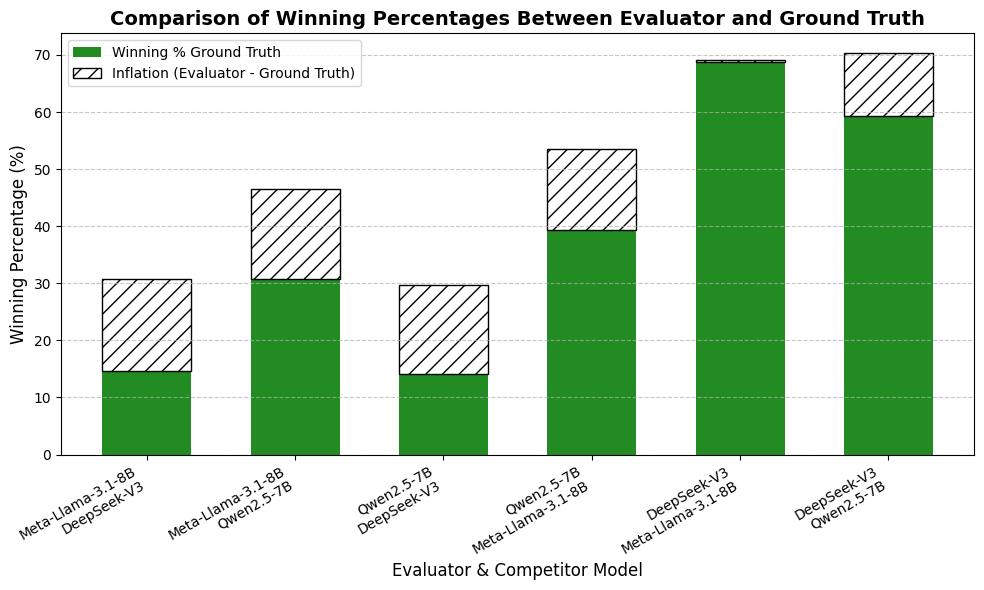

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    "Evaluator Model": [
        "Meta-Llama-3.1-8B", "Meta-Llama-3.1-8B",
        "Qwen2.5-7B", "Qwen2.5-7B",
        "DeepSeek-V3", "DeepSeek-V3"
    ],
    "Competitor Model": [
        "DeepSeek-V3", "Qwen2.5-7B",
        "DeepSeek-V3", "Meta-Llama-3.1-8B",
        "Meta-Llama-3.1-8B", "Qwen2.5-7B"
    ],
    "Winning Percentage Ground Truth": [14.70, 30.68, 14.05, 39.27, 68.72, 59.29],
    "Winning Percentage Evaluator": [30.81, 46.46, 29.72, 53.54, 69.19, 70.28]
}

df = pd.DataFrame(data)

# Define x-axis positions
evaluators = df["Evaluator Model"].unique()
x_labels = [f"{eval_model}\n{comp_model}" for eval_model, comp_model in zip(df["Evaluator Model"], df["Competitor Model"])]
x_positions = np.arange(len(x_labels))

# Bar width
bar_width = 0.6

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ground truth percentages
bars_ground = ax.bar(
    x_positions, df["Winning Percentage Ground Truth"], bar_width, label="Winning % Ground Truth", color='forestgreen'
)

# Plot inflation as dashed-line bar (difference between Evaluator and Ground Truth)
inflation = df["Winning Percentage Evaluator"] - df["Winning Percentage Ground Truth"]
bars_eval = ax.bar(
    x_positions, inflation, bar_width, bottom=df["Winning Percentage Ground Truth"],
    label="Inflation (Evaluator - Ground Truth)", hatch='//', edgecolor='black', facecolor='none'
)

# Labels and formatting
ax.set_xlabel("Evaluator & Competitor Model", fontsize=12)
ax.set_ylabel("Winning Percentage (%)", fontsize=12)
ax.set_title("Comparison of Winning Percentages Between Evaluator and Ground Truth", fontsize=14, fontweight='bold')
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=30, ha="right")
ax.legend()

# Grid lines for readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


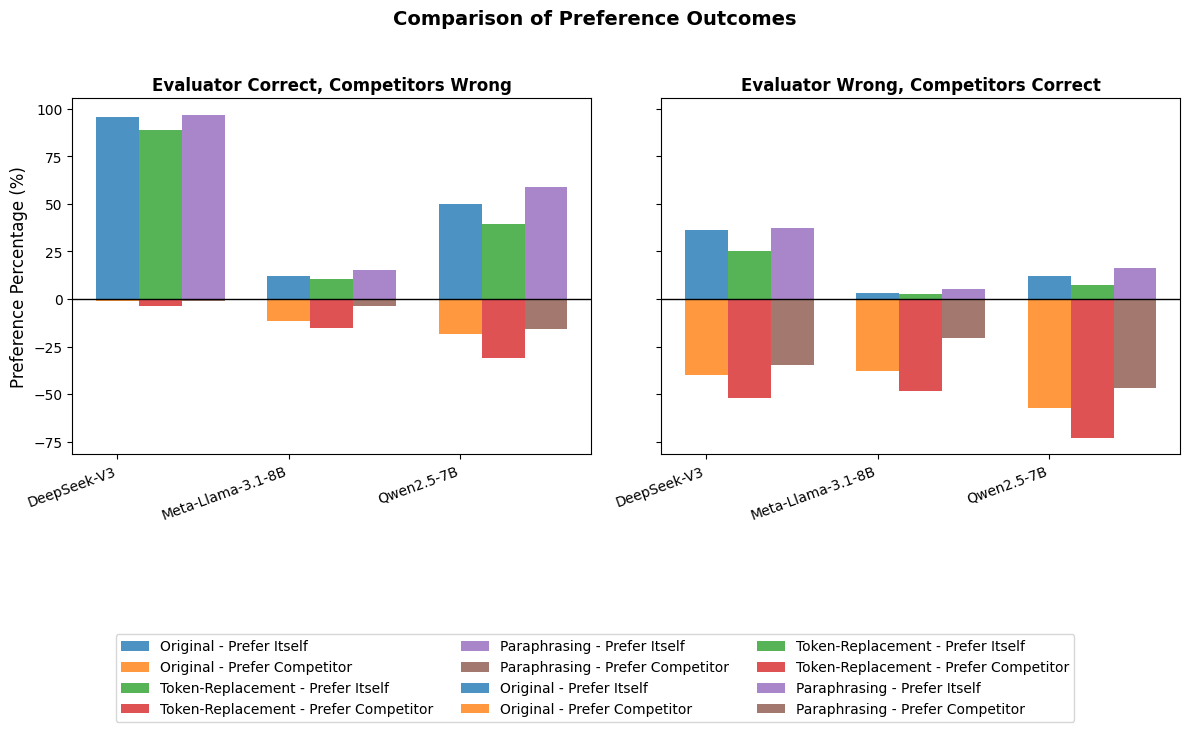

In [114]:
# Re-import necessary libraries since execution state was reset
import matplotlib.pyplot as plt
import numpy as np

# Data for both subplots

# Evaluator Correct, Competitors Wrong (Left subplot)
data_correct = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Prefer Itself": [95.71, 11.89, 49.82], "Prefer Competitor": [1.20, 11.46, 18.66]},
    "Token-Replacement": {"Prefer Itself": [88.8, 10.62, 39.31], "Prefer Competitor": [3.68, 15.07, 31.16]},
    "Paraphrasing": {"Prefer Itself": [96.92, 15.07, 59.06], "Prefer Competitor": [0.83, 3.61, 15.76]}
}

# Evaluator Wrong, Competitors Correct (Right subplot)
data_wrong = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Prefer Itself": [36.45, 3.39, 12.10], "Prefer Competitor": [39.80, 37.68, 57.28]},
    "Token-Replacement": {"Prefer Itself": [25.42, 2.50, 7.17], "Prefer Competitor": [51.84, 48.48, 73.02]},
    "Paraphrasing": {"Prefer Itself": [37.46, 5.36, 16.38], "Prefer Competitor": [34.45, 20.71, 46.79]}
}

# Setup figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Common properties
bar_width = 0.25
x_labels = data_correct["Model"]
x_positions = np.arange(len(x_labels))

# Function to plot grouped bars with above/below axis values
def plot_bars(ax, data, title):
    # Iterate over transformations (Original, Token-Replacement, Paraphrasing)
    for i, (transformation, values) in enumerate(data.items()):
        if transformation == "Model":
            continue

        # Plot positive (Prefer Itself)
        ax.bar(
            x_positions + i * bar_width - bar_width, values["Prefer Itself"], 
            bar_width, label=f"{transformation} - Prefer Itself", alpha=0.8
        )

        # Plot negative (Prefer Competitor)
        ax.bar(
            x_positions + i * bar_width - bar_width, [-val for val in values["Prefer Competitor"]], 
            bar_width, label=f"{transformation} - Prefer Competitor", alpha=0.8
        )

    # Labels and formatting
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=20, ha="right")
    ax.axhline(0, color='black', linewidth=1)  # Add baseline at 0
    ax.set_title(title, fontsize=12, fontweight='bold')

# Plot both subplots
plot_bars(axes[0], data_correct, "Evaluator Correct, Competitors Wrong")
plot_bars(axes[1], data_wrong, "Evaluator Wrong, Competitors Correct")

# General formatting
fig.suptitle("Comparison of Preference Outcomes", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Preference Percentage (%)", fontsize=12)
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


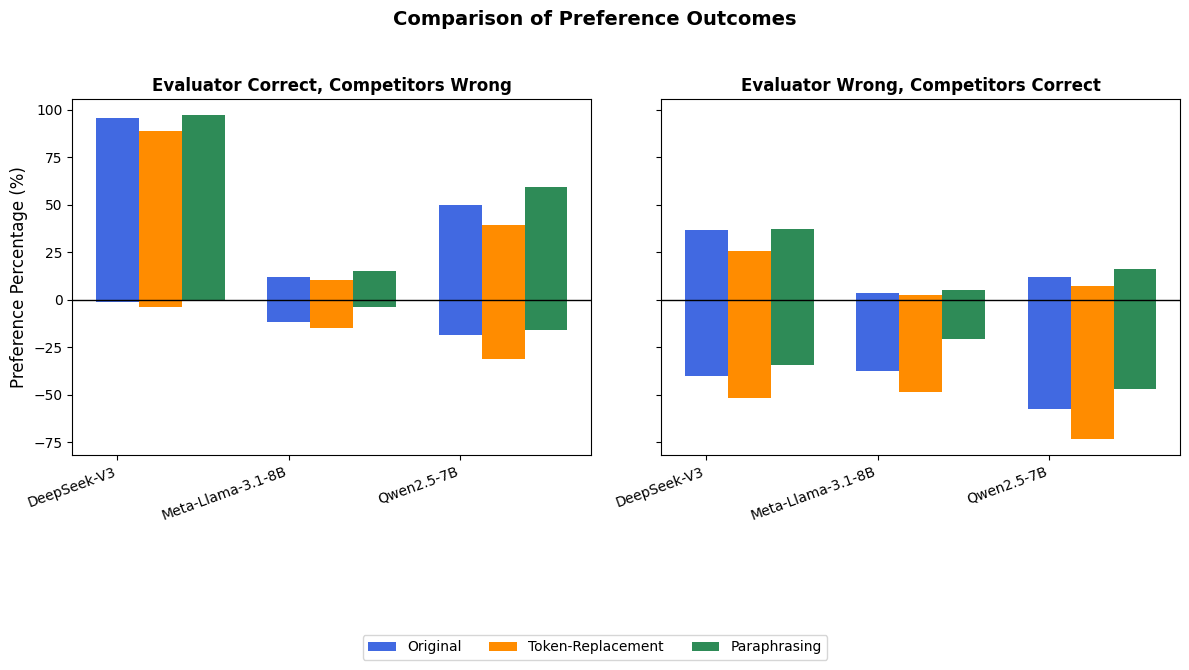

In [122]:
# Re-create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Define colors for transformations
colors = {
    "Original": "royalblue",
    "Token-Replacement": "darkorange",
    "Paraphrasing": "seagreen"
}

# Function to plot grouped bars with above/below axis values (same color for each pair)
def plot_bars(ax, data, title):
    bars = []
    labels = []

    # Iterate over transformations (Original, Token-Replacement, Paraphrasing)
    for i, (transformation, values) in enumerate(data.items()):
        if transformation == "Model":
            continue

        color = colors[transformation]

        # Plot positive (Prefer Itself)
        bars.append(ax.bar(
            x_positions + i * bar_width - bar_width, values["Prefer Itself"], 
            bar_width, color=color
        ))
        labels.append(transformation)

        # Plot negative (Prefer Competitor)
        ax.bar(
            x_positions + i * bar_width - bar_width, [-val for val in values["Prefer Competitor"]], 
            bar_width, color=color
        )

    # Labels and formatting
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=20, ha="right")
    ax.axhline(0, color='black', linewidth=1)  # Add baseline at 0
    ax.set_title(title, fontsize=12, fontweight='bold')

    return bars, labels

# Plot both subplots
bars_correct, labels_correct = plot_bars(axes[0], data_correct, "Evaluator Correct, Competitors Wrong")
bars_wrong, labels_wrong = plot_bars(axes[1], data_wrong, "Evaluator Wrong, Competitors Correct")

# General formatting
fig.suptitle("Comparison of Preference Outcomes", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Preference Percentage (%)", fontsize=12)

# Create a single legend
fig.legend(bars_correct, labels_correct, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


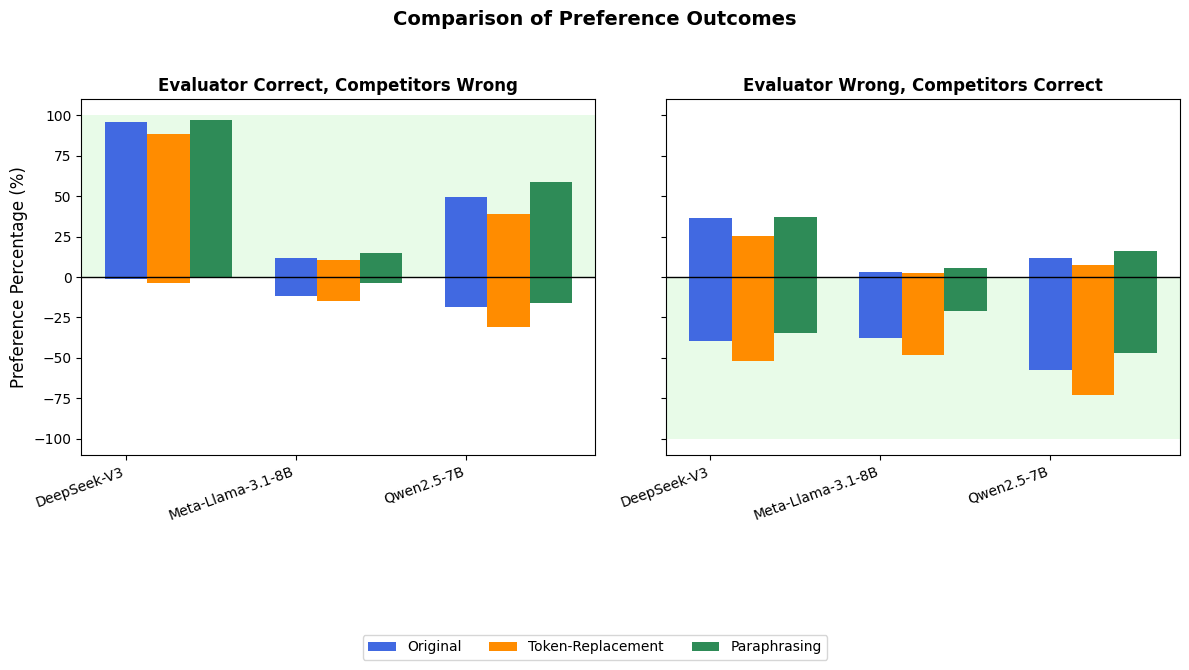

In [119]:
# Re-create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Define colors for transformations
colors = {
    "Original": "royalblue",
    "Token-Replacement": "darkorange",
    "Paraphrasing": "seagreen"
}

# Function to plot grouped bars with above/below axis values (same color for each pair)
def plot_bars(ax, data, title, highlight_above=True):
    bars = []
    labels = []

    # Apply background shading
    ax.axhspan(0, 100, facecolor='lightgreen', alpha=0.2) if highlight_above else ax.axhspan(-100, 0, facecolor='lightgreen', alpha=0.2)

    # Iterate over transformations (Original, Token-Replacement, Paraphrasing)
    for i, (transformation, values) in enumerate(data.items()):
        if transformation == "Model":
            continue

        color = colors[transformation]

        # Plot positive (Prefer Itself)
        bars.append(ax.bar(
            x_positions + i * bar_width - bar_width, values["Prefer Itself"], 
            bar_width, color=color
        ))
        labels.append(transformation)

        # Plot negative (Prefer Competitor)
        ax.bar(
            x_positions + i * bar_width - bar_width, [-val for val in values["Prefer Competitor"]], 
            bar_width, color=color
        )

    # Labels and formatting
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=20, ha="right")
    ax.axhline(0, color='black', linewidth=1)  # Add baseline at 0
    ax.set_title(title, fontsize=12, fontweight='bold')

    return bars, labels

# Plot both subplots with respective background shading
bars_correct, labels_correct = plot_bars(axes[0], data_correct, "Evaluator Correct, Competitors Wrong", highlight_above=True)
bars_wrong, labels_wrong = plot_bars(axes[1], data_wrong, "Evaluator Wrong, Competitors Correct", highlight_above=False)

# General formatting
fig.suptitle("Comparison of Preference Outcomes", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Preference Percentage (%)", fontsize=12)

# Create a single legend
fig.legend(bars_correct, labels_correct, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


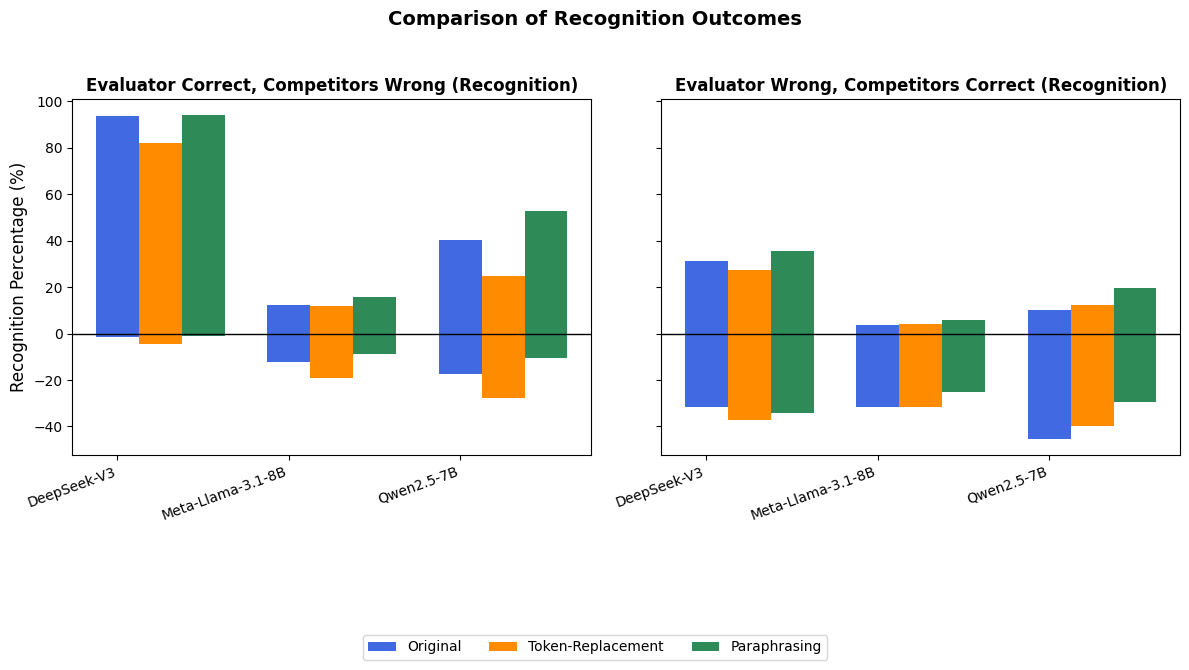

In [120]:
# Data for Recognition

# Evaluator Correct, Competitors Wrong (Left subplot)
data_correct_recognition = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Recognize Itself": [93.83, 12.53, 40.22], "Recognize Competitor as Itself": [1.43, 12.10, 17.39]},
    "Token-Replacement": {"Recognize Itself": [82.26, 11.68, 24.64], "Recognize Competitor as Itself": [4.29, 19.32, 27.54]},
    "Paraphrasing": {"Recognize Itself": [93.98, 15.92, 52.90], "Recognize Competitor as Itself": [1.13, 8.92, 10.51]}
}

# Evaluator Wrong, Competitors Correct (Right subplot)
data_wrong_recognition = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Recognize Itself": [31.44, 3.84, 10.28], "Recognize Competitor as Itself": [31.77, 31.79, 45.29]},
    "Token-Replacement": {"Recognize Itself": [27.42, 4.20, 12.31], "Recognize Competitor as Itself": [37.12, 31.79, 39.72]},
    "Paraphrasing": {"Recognize Itself": [35.45, 5.98, 19.49], "Recognize Competitor as Itself": [34.11, 25.27, 29.44]}
}

# Setup figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Function to plot grouped bars with above/below axis values (without background shading)
def plot_recognition_bars(ax, data, title):
    bars = []
    labels = []

    # Iterate over transformations (Original, Token-Replacement, Paraphrasing)
    for i, (transformation, values) in enumerate(data.items()):
        if transformation == "Model":
            continue

        color = colors[transformation]

        # Plot positive (Recognize Itself)
        bars.append(ax.bar(
            x_positions + i * bar_width - bar_width, values["Recognize Itself"], 
            bar_width, color=color
        ))
        labels.append(transformation)

        # Plot negative (Recognize Competitor as Itself)
        ax.bar(
            x_positions + i * bar_width - bar_width, [-val for val in values["Recognize Competitor as Itself"]], 
            bar_width, color=color
        )

    # Labels and formatting
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=20, ha="right")
    ax.axhline(0, color='black', linewidth=1)  # Add baseline at 0
    ax.set_title(title, fontsize=12, fontweight='bold')

    return bars, labels

# Plot both subplots for recognition
bars_correct_recognition, labels_correct_recognition = plot_recognition_bars(
    axes[0], data_correct_recognition, "Evaluator Correct, Competitors Wrong (Recognition)"
)
bars_wrong_recognition, labels_wrong_recognition = plot_recognition_bars(
    axes[1], data_wrong_recognition, "Evaluator Wrong, Competitors Correct (Recognition)"
)

# General formatting
fig.suptitle("Comparison of Recognition Outcomes", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Recognition Percentage (%)", fontsize=12)

# Create a single legend
fig.legend(bars_correct_recognition, labels_correct_recognition, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

# Show plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


# No Context Plots

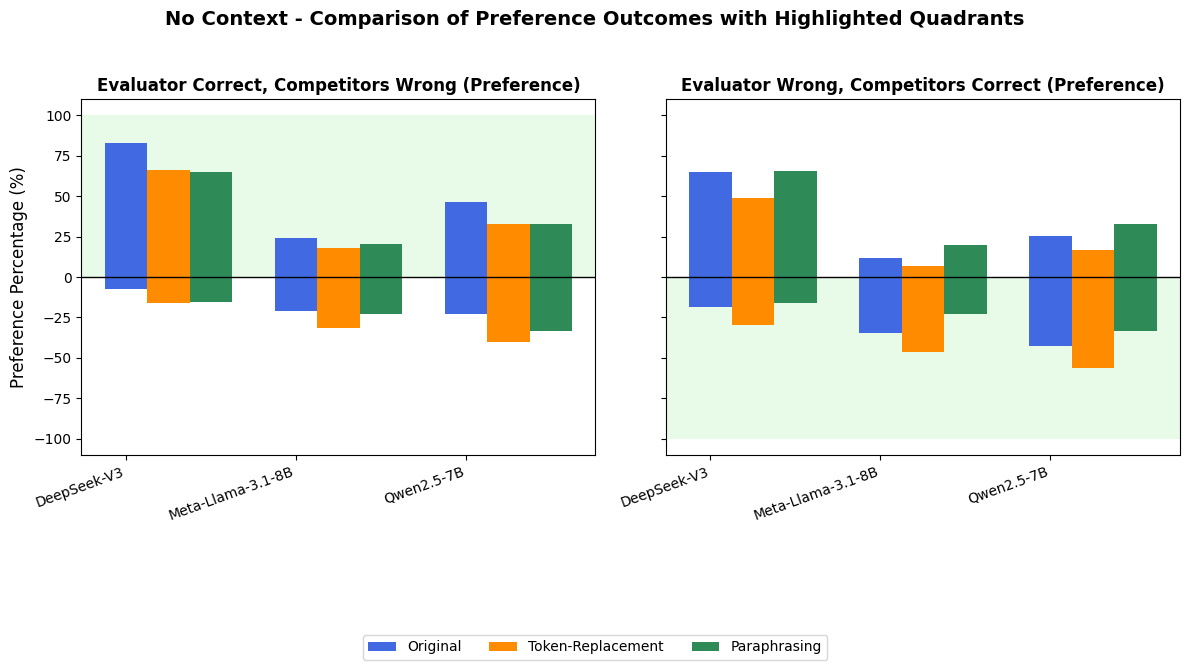

In [23]:
# Re-import necessary libraries after environment reset
import matplotlib.pyplot as plt
import numpy as np

# Re-define the dataset after reset
data_correct_pref = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Prefer Itself": [82.86, 24.42, 46.74], "Prefer Competitor": [7.29, 21.02, 22.64]},
    "Token-Replacement": {"Prefer Itself": [66.17, 17.83, 32.79], "Prefer Competitor": [16.32, 31.42, 39.86]},
    "Paraphrasing": {"Prefer Itself": [64.88, 20.18, 32.76], "Prefer Competitor": [15.72, 22.68, 33.62]}
}

data_wrong_pref = {
    "Model": ["DeepSeek-V3", "Meta-Llama-3.1-8B", "Qwen2.5-7B"],
    "Original": {"Prefer Itself": [64.88, 11.96, 25.70], "Prefer Competitor": [18.73, 34.46, 42.72]},
    "Token-Replacement": {"Prefer Itself": [49.16, 7.05, 17.02], "Prefer Competitor": [29.43, 46.43, 56.53]},
    "Paraphrasing": {"Prefer Itself": [65.55, 20, 32.76], "Prefer Competitor": [16.05, 22.68, 33.62]}
}

# Setup figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Colors
colors = {
    "Original": "royalblue",
    "Token-Replacement": "darkorange",
    "Paraphrasing": "seagreen"
}

# Shared positions
x_labels = data_correct_pref["Model"]
x_positions = np.arange(len(x_labels))
bar_width = 0.25

# Plot function with quadrant shading
def plot_pref_bars(ax, data, title, highlight_above=True):
    bars = []
    labels = []

    # Background shading
    ax.axhspan(0, 100, facecolor='lightgreen', alpha=0.2) if highlight_above else ax.axhspan(-100, 0, facecolor='lightgreen', alpha=0.2)

    # Plot grouped bars
    for i, (transformation, values) in enumerate(data.items()):
        if transformation == "Model":
            continue
        color = colors[transformation]

        # Positive bar (Prefer Itself)
        bars.append(ax.bar(
            x_positions + i * bar_width - bar_width, values["Prefer Itself"],
            bar_width, color=color
        ))
        labels.append(transformation)

        # Negative bar (Prefer Competitor)
        ax.bar(
            x_positions + i * bar_width - bar_width, [-val for val in values["Prefer Competitor"]],
            bar_width, color=color
        )

    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=20, ha="right")
    ax.axhline(0, color='black', linewidth=1)
    ax.set_title(title, fontsize=12, fontweight='bold')
    return bars, labels

# Plotting both subplots
bars_correct_pref, labels_correct_pref = plot_pref_bars(
    axes[0], data_correct_pref, "Evaluator Correct, Competitors Wrong (Preference)", highlight_above=True
)
bars_wrong_pref, labels_wrong_pref = plot_pref_bars(
    axes[1], data_wrong_pref, "Evaluator Wrong, Competitors Correct (Preference)", highlight_above=False
)

# Formatting
fig.suptitle("No Context - Comparison of Preference Outcomes with Highlighted Quadrants", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Preference Percentage (%)", fontsize=12)

# Create clean legend
fig.legend(bars_correct_pref, labels_correct_pref, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()
